**Assignment 2 - Diagnostic Titanic**

The purpose of this assignment is to apply methods of diagnostic analytics to data sets of your choice.
First, with the data you chose, practice in various ways preparing and modifying data for analysis, that is, study your data, explore and alter it and apply filtering when needed. In combination with those, use diagnostic analysis in order to analyze your data sets. Particularly, include at least cross-tabulations, correlations and comparison of statistical numbers between groups in your analysis. Use graphical representations for illustration.

Data sets for Assignment - titanic.xlsx which contains a list of passengers on the notorious ship Titanic. Variable descriptions can be found by opening the file in Excel.

This data can be asked, e.g., following questions. How many of the passengers on board were women, how many of them were men? What was the passengers' age distribution? What proportion of passengers survived? How were passengers divided into different cabins? Was there a difference in survival rates between men and women? Did cabin class affect survival? Did the age distribution of the survivors differ from the age distribution of the deceased? And so on, and so forth.

##Dianostic analytics


1.   Crosstab
2.   Comparing stats in different groups
3.   Correlation coefficient
4.   Scatter chart

###0. Start - connect to drive, import libs, load data

In [ ]:
# connect to drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/DA_Python

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/DA_Python


In [ ]:
#import libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

In [ ]:
#load data
df =pd.read_excel('titanic.xlsx')
df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
survival = ['not survived', 'survived']
age_groups=[0,10,20,30,40,50,60,70,80]
fare_groups=[0,50,100,150,200,250,300,350,400,450,500,550,600]
ports = ['Cherbourg', 'Queenstown', 'Southampton']
df['age_groups'] = pd.cut(df['age'] , bins=age_groups, right=False)
df['fare_groups'] = pd.cut(df['fare'] , bins=fare_groups, right=False)
df


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_groups,fare_groups
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO","[20.0, 30.0)","[200, 250)"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","[0.0, 10.0)","[150, 200)"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","[0.0, 10.0)","[150, 200)"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON","[30.0, 40.0)","[150, 200)"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","[20.0, 30.0)","[150, 200)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,"[10.0, 20.0)","[0, 50)"
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN,"[0, 50)"
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,"[20.0, 30.0)","[0, 50)"
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,"[20.0, 30.0)","[0, 50)"


###01. General - shape, info(), describe()

In [ ]:
df.shape

(1309, 14)

In [ ]:
#general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
#missing values
df.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


In [ ]:
#statistical number
df.describe().style.format('{:.2f}')

,pclass,survived,age,sibsp,parch,fare,body
count,1309.00,1309.00,1046.00,1309.00,1309.00,1308.00,121.00
mean,2.29,0.38,29.88,0.50,0.39,33.30,160.81
std,0.84,0.49,14.41,1.04,0.87,51.76,97.70
min,1.00,0.00,0.17,0.00,0.00,0.00,1.00
25%,2.00,0.00,21.00,0.00,0.00,7.90,72.00
50%,3.00,0.00,28.00,0.00,0.00,14.45,155.00
75%,3.00,1.00,39.00,1.00,0.00,31.27,256.00
max,3.00,1.00,80.00,8.00,9.00,512.33,328.00


###2. Comparing statistical numbers between groups

In [ ]:
survival_stats = df.groupby('survived')[['pclass','sibsp','parch','age','fare']].describe()
survival_stats.style.format(precision=1)

###1. Class and survival rate
Conclusion: 1st class passenger survived the most, 2nd class passenger survived the least.

In [ ]:
df_class = pd.crosstab(df['pclass'], df['survived'])
df_class.columns = survival
df_class.index.name="passenger class"
df_class

,not survived,survived
passenger class,,
1,123,200
2,158,119
3,528,181


In [ ]:
# percentages of column total
df_class_col = pd.crosstab(df['pclass'], df['survived'], normalize='index')*100
df_class_col.columns = survival

# n-values
n0= df_class['not survived'].sum()
n1= df_class['survived'].sum()
df_class_col.columns = [f'not survived, n={str(int(n0))}' , f'survived,n={str(int(n1))}']
# change index title
df_class_col.index.name = 'passenger class'
df_class_col.style.format('{:.2f}%')

,"not survived, n=809","survived,n=500"
passenger class,,
1,38.08%,61.92%
2,57.04%,42.96%
3,74.47%,25.53%


In [ ]:
# percentages of row total
df_class_row = pd.crosstab(df['pclass'], df['survived'], normalize='index')*100
df_class_row.columns = survival
# n-values
n_1 = df_class.loc[1, :].sum()
n_2 = df_class.loc[2, :].sum()
n_3 = df_class.loc[3, :].sum()
# add n-values
df_class_row.index = [f'1, n={n_1}' , f'2, n={n_2}', f'3, n={n_3}']
# change index title
df_class_row.index.name = 'passenger class'
df_class_row.style.format('{:.2f}%')

,not survived,survived
passenger class,,
"1, n=323",38.08%,61.92%
"2, n=277",57.04%,42.96%
"3, n=709",74.47%,25.53%


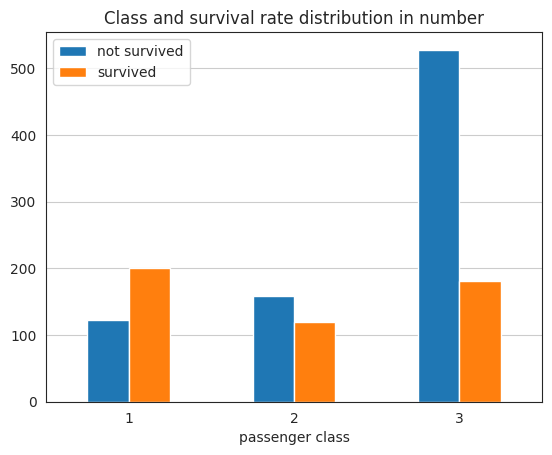

In [ ]:
df_class.plot(kind='bar', rot=0, title ='Class and survival rate distribution in number')
plt.grid(axis='y')

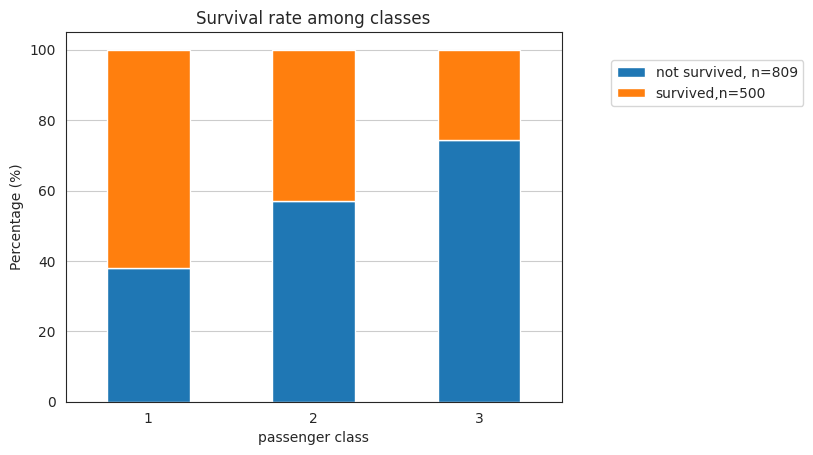

In [ ]:
#how many percentage of passenger from a certain class survived or not in total number of survived/ not passengers
df_class_col.plot(kind='bar', stacked =True, rot=0, title ='Survival rate among classes')
plt.ylabel('Percentage (%)')
plt.grid(axis='y')
plt.legend(loc=(1.1,0.8))

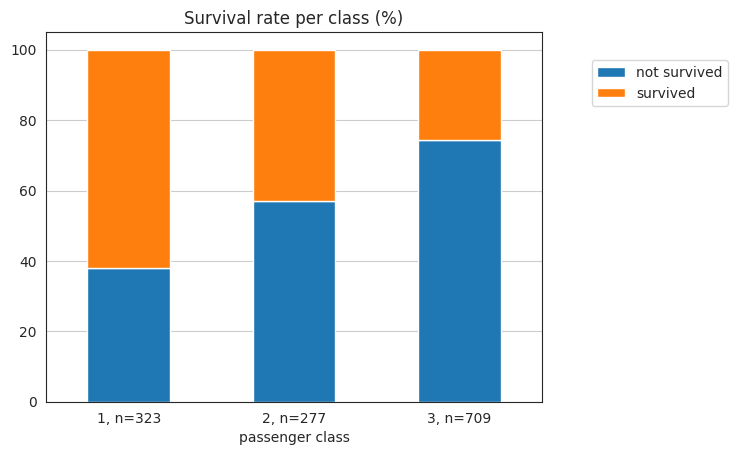

In [ ]:
#how many percentage of passengers survived or not within each class
df_class_row.plot(kind='bar', stacked =True, rot=0, title ='Survival rate per class (%)')
plt.grid(axis='y')
plt.legend(loc=(1.1,0.8))


###2. Gender and survival rate
Conclusion: most of female passengers survived

In [ ]:
df_sex = pd.crosstab(df['sex'], df['survived'])
df_sex.columns = survival
df_sex.index.name="sex"
df_sex

,not survived,survived
sex,,
female,127,339
male,682,161


In [ ]:
# percentages of column total
df_sex_col = pd.crosstab(df['sex'], df['survived'], normalize='index')*100
df_sex_col.columns = survival
# n-values
n0= df_sex['not survived'].sum()
n1= df_sex['survived'].sum()
df_sex_col.columns = [f'not survived, n={str(int(n0))}' , f'survived,n={str(int(n1))}']
# change index title
df_sex_col.index.name = 'sex'
df_sex_col.style.format('{:.2f}%')

,"not survived, n=809","survived,n=500"
sex,,
female,27.25%,72.75%
male,80.90%,19.10%


In [ ]:
# percentages of row total
df_sex_row = pd.crosstab(df['sex'], df['survived'], normalize='index')*100
df_sex_row.columns = survival
# n-values
n_female = df_sex.loc['female'].sum()
n_male = df_sex.loc['male'].sum()
# add n-values
df_sex_row.index = [f'female, n={n_female}' , f'male, n={n_male}']
# change index title
df_sex_row.index.name = 'sex'
df_sex_row.style.format('{:.2f}%')

,not survived,survived
sex,,
"female, n=466",27.25%,72.75%
"male, n=843",80.90%,19.10%


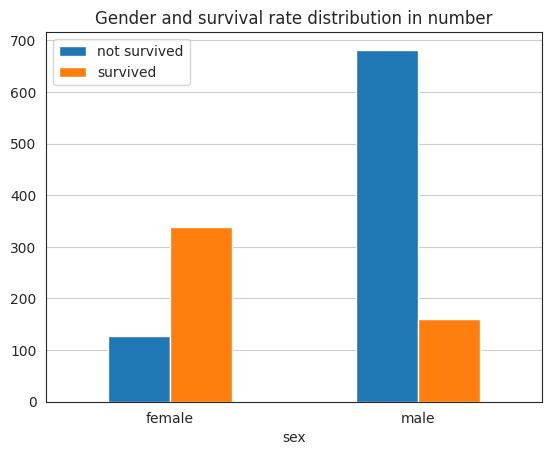

In [ ]:
df_sex.plot(kind='bar', rot=0, title ='Gender and survival rate distribution in number')
plt.grid(axis='y')

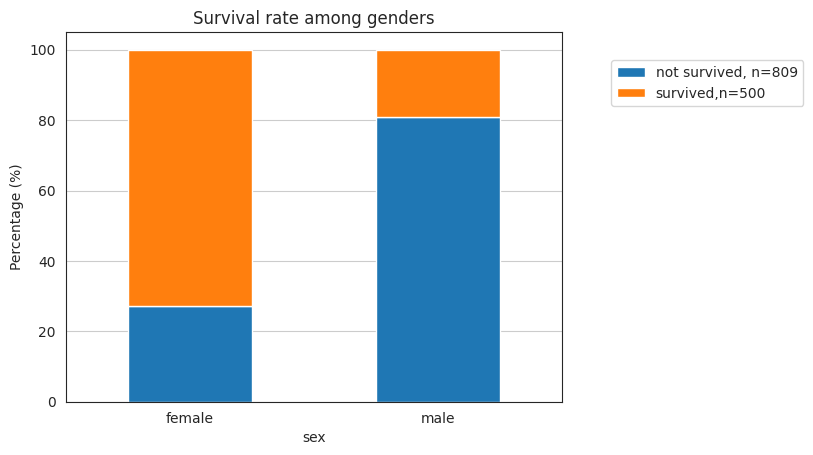

In [ ]:
#how many percentage of passenger of a certain gender survived or not in total number of survived/ not passengers
df_sex_col.plot(kind='bar', stacked =True, rot=0, title ='Survival rate among genders')
plt.ylabel('Percentage (%)')
plt.grid(axis='y')
plt.legend(loc=(1.1,0.8))

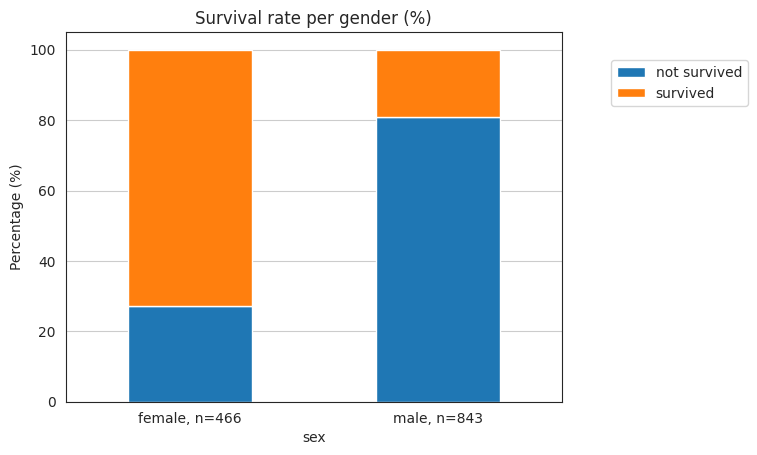

In [ ]:
#how many percentage of male/female passengers survived or not
df_sex_row.plot(kind='bar', stacked =True, rot=0, title ='Survival rate per gender (%)')
plt.ylabel('Percentage (%)')
plt.grid(axis='y')
plt.legend(loc=(1.1,0.8))

In [ ]:
df['sex_num'] = df['sex'].map({'female': 0, 'male': 1})
corr_sex_survived = df['sex_num'].corr(df['survived'])
corr_sex_survived

-0.5286930913889885

###3. Age and survival rate

In [ ]:
#Passengers' age distribution - frequency table 1/2
#classified distribution
#df['age_groups'] = pd.cut(df['age'] , bins=age_groups, right=False)
#df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_groups
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO","[20.0, 30.0)"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","[0.0, 10.0)"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","[0.0, 10.0)"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON","[30.0, 40.0)"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","[20.0, 30.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,"[10.0, 20.0)"
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,"[20.0, 30.0)"
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,"[20.0, 30.0)"


In [ ]:
df_age = pd.crosstab(df['age_groups'] , df['survived'])
df_age.columns = survival
df_age.index.name="age groups"
df_age

,not survived,survived
age groups,,
"[0, 10)",32,50
"[10, 20)",87,56
"[20, 30)",217,127
"[30, 40)",134,98
"[40, 50)",83,52
"[50, 60)",38,32
"[60, 70)",22,10
"[70, 80)",6,1


In [ ]:
# percentages of column total
df_age_col = pd.crosstab(df['age_groups'], df['survived'], normalize='index')*100
df_age_col.columns = survival
# n-values
n0= df_age['not survived'].sum()
n1= df_age['survived'].sum()
df_age_col.columns = [f'not survived, n={str(int(n0))}' , f'survived,n={str(int(n1))}']
# change index title
df_age_col.index.name = 'age group'
df_age_col.style.format('{:.2f}%')

,"not survived, n=619","survived,n=426"
age group,,
"[0, 10)",39.02%,60.98%
"[10, 20)",60.84%,39.16%
"[20, 30)",63.08%,36.92%
"[30, 40)",57.76%,42.24%
"[40, 50)",61.48%,38.52%
"[50, 60)",54.29%,45.71%
"[60, 70)",68.75%,31.25%
"[70, 80)",85.71%,14.29%


In [ ]:
# percentages of row total
df_age_row = pd.crosstab(df['age_groups'], df['survived'], normalize='index')*100
df_age_row.columns = survival
# n-values
n_age_groups= df['age_groups'].value_counts().sort_index()
#add n-value
df_age_row.index = [f'{age_group}, n={n_age_groups[age_group]}' for age_group in df_age_row.index]
# change index title
df_age_row.index.name = 'age groups'
df_age_row.style.format('{:.2f}%')

,not survived,survived
age groups,,
"[0, 10), n=82",39.02%,60.98%
"[10, 20), n=143",60.84%,39.16%
"[20, 30), n=344",63.08%,36.92%
"[30, 40), n=232",57.76%,42.24%
"[40, 50), n=135",61.48%,38.52%
"[50, 60), n=70",54.29%,45.71%
"[60, 70), n=32",68.75%,31.25%
"[70, 80), n=7",85.71%,14.29%


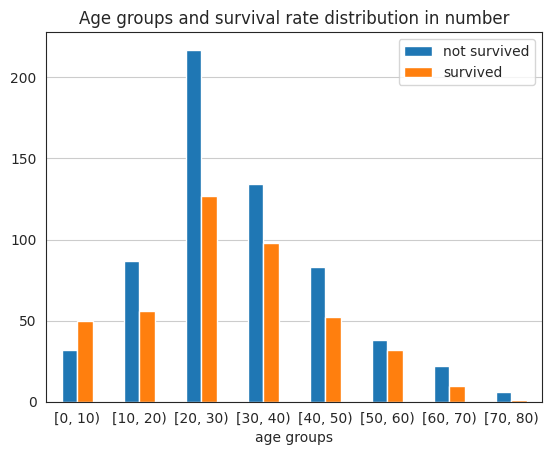

In [ ]:
df_age.plot(kind='bar', rot=0, title ='Age groups and survival rate distribution in number')
plt.grid(axis='y')

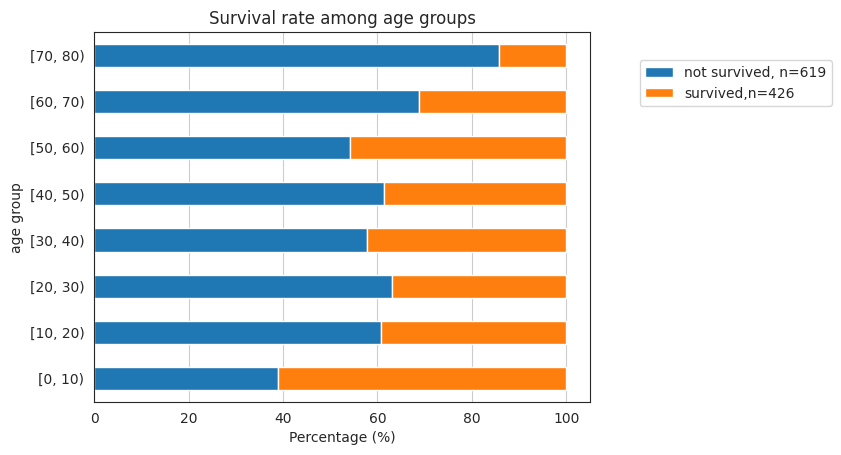

In [ ]:
#how many percentage of passenger from a certain age group survived or not in total number of survived/ not passengers
df_age_col.plot(kind='barh', stacked =True, rot=0, title ='Survival rate among age groups')
plt.xlabel('Percentage (%)')
plt.grid(axis='x')
plt.legend(loc=(1.1,0.8))

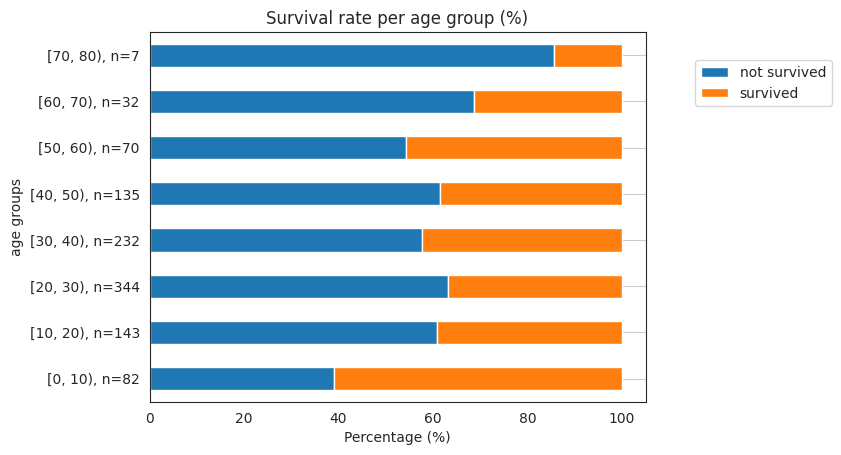

In [ ]:
#how many percentage of passengers survived or not within each class
df_age_row.plot(kind='barh', stacked =True, rot=0, title ='Survival rate per age group (%)')
plt.xlabel('Percentage (%)')
plt.grid(axis='y')
plt.legend(loc=(1.1,0.8))

###4. Fare and survival rate

In [ ]:
#passenger fare distribution - classified distribution - adding column 'fare_groups'
df['fare_groups'] = pd.cut(df['fare'] , bins=fare_groups, right=False)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_groups,fare_groups
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO","[20.0, 30.0)","[200, 250)"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","[0.0, 10.0)","[150, 200)"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","[0.0, 10.0)","[150, 200)"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON","[30.0, 40.0)","[150, 200)"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","[20.0, 30.0)","[150, 200)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,"[10.0, 20.0)","[0, 50)"
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN,"[0, 50)"
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,"[20.0, 30.0)","[0, 50)"
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,"[20.0, 30.0)","[0, 50)"


In [ ]:
#passenger fare distribution - classified distribution - frequency table
df_fare = pd.crosstab(df['fare_groups'] , df['survived'])
df_fare.columns = survival
df_fare.index.name="fare groups"
df_fare

,not survived,survived
fare groups,,
"[0, 50)",724,342
"[50, 100)",60,98
"[100, 150)",7,26
"[150, 200)",5,8
"[200, 250)",9,12
"[250, 300)",3,10
"[500, 550)",0,4


In [ ]:
# percentages of column total
df_fare_col = pd.crosstab(df['fare_groups'], df['survived'], normalize='index')*100
df_fare_col.columns = survival
# n-values
n0= df_fare['not survived'].sum()
n1= df_fare['survived'].sum()
df_fare_col.columns = [f'not survived, n={str(int(n0))}' , f'survived,n={str(int(n1))}']
# change index title
df_fare_col.index.name = 'fare groups'
df_fare_col.style.format('{:.2f}%')

,"not survived, n=808","survived,n=500"
fare groups,,
"[0, 50)",67.92%,32.08%
"[50, 100)",37.97%,62.03%
"[100, 150)",21.21%,78.79%
"[150, 200)",38.46%,61.54%
"[200, 250)",42.86%,57.14%
"[250, 300)",23.08%,76.92%
"[500, 550)",0.00%,100.00%


In [ ]:
# percentages of row total
df_fare_row = pd.crosstab(df['fare_groups'], df['survived'], normalize='index')*100
df_fare_row.columns = survival
# n-values
n_fare_groups= df['fare_groups'].value_counts().sort_index()
#add n-value
df_fare_row.index = [f'{fare_group}, n={n_fare_groups[fare_group]}' for fare_group in df_fare_row.index]
# change index title
df_fare_row.index.name = 'fare groups'
df_fare_row.style.format('{:.2f}%')

,not survived,survived
fare groups,,
"[0, 50), n=1066",67.92%,32.08%
"[50, 100), n=158",37.97%,62.03%
"[100, 150), n=33",21.21%,78.79%
"[150, 200), n=13",38.46%,61.54%
"[200, 250), n=21",42.86%,57.14%
"[250, 300), n=13",23.08%,76.92%
"[500, 550), n=4",0.00%,100.00%


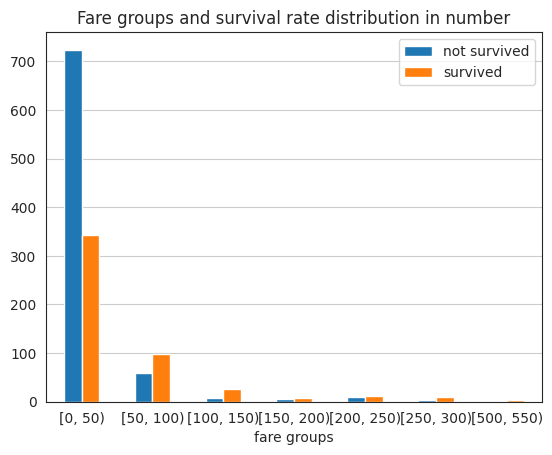

In [ ]:
df_fare.plot(kind='bar', rot=0, title ='Fare groups and survival rate distribution in number')
plt.grid(axis='y')

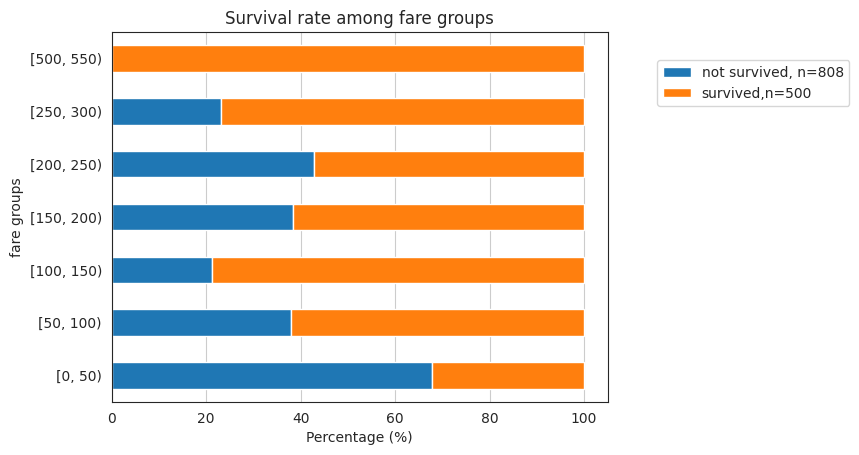

In [ ]:
#how many percentage of passenger from a certain fare group survived or not in total number of survived/ not passengers
df_fare_col.plot(kind='barh', stacked =True, rot=0, title ='Survival rate among fare groups')
plt.xlabel('Percentage (%)')
plt.grid(axis='x')
plt.legend(loc=(1.1,0.8))

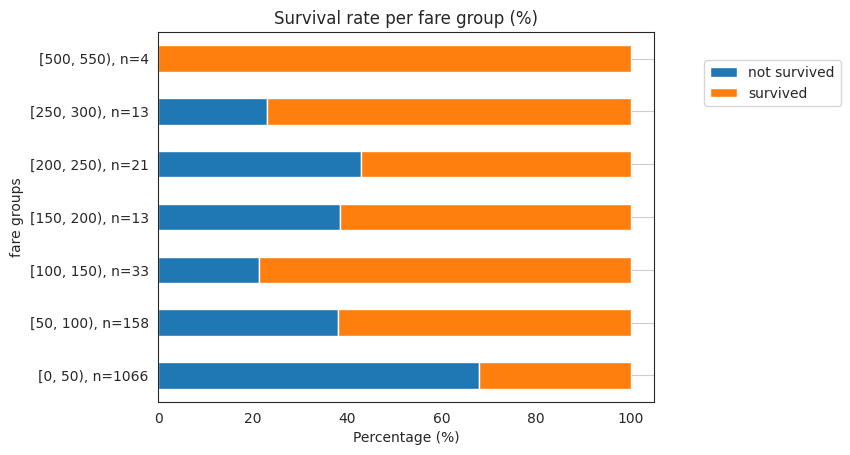

In [ ]:
#how many percentage of passengers survived or not within each fare group
df_fare_row.plot(kind='barh', stacked =True, rot=0, title ='Survival rate per fare group (%)')
plt.xlabel('Percentage (%)')
plt.grid(axis='y')
plt.legend(loc=(1.1,0.8))

###5. Port of embarkation and survival rate
Conclusion: Southampton is most popular port of embarkation among passengers

In [ ]:
df_port= pd.crosstab(df['embarked'], df['survived'])
df_port.columns = survival
df_port.index.name= "port of embarkation"
df_port

,not survived,survived
port of embarkation,,
C,120,150
Q,79,44
S,610,304


In [ ]:
df_port_col = pd.crosstab(df['embarked'], df['survived'], normalize='index')*100
df_port_col.columns = survival
# n-values
n0= df_port['not survived'].sum()
n1= df_port['survived'].sum()
df_port_col.columns = [f'not survived, n={str(int(n0))}' , f'survived,n={str(int(n1))}']
# change index title
df_port_col.index.name = 'port of embarkation'
df_port_col.style.format('{:.2f}%')

,"not survived, n=809","survived,n=498"
port of embarkation,,
C,44.44%,55.56%
Q,64.23%,35.77%
S,66.74%,33.26%


In [ ]:
# percentages of row total
df_port_row = pd.crosstab(df['embarked'], df['survived'], normalize='index')*100
df_port_row.columns = survival
# n-values
n_1 = df_port.loc['C', :].sum()
n_2 = df_port.loc['Q', :].sum()
n_3 = df_port.loc['S', :].sum()
# add n-values
df_port_row.index = [f'C, n={n_1}' , f'Q, n={n_2}', f'S, n={n_3}']
# change index title
df_port_row.index.name = 'port of embarkation'
df_port_row.style.format('{:.2f}%')

,not survived,survived
port of embarkation,,
"C, n=270",44.44%,55.56%
"Q, n=123",64.23%,35.77%
"S, n=914",66.74%,33.26%


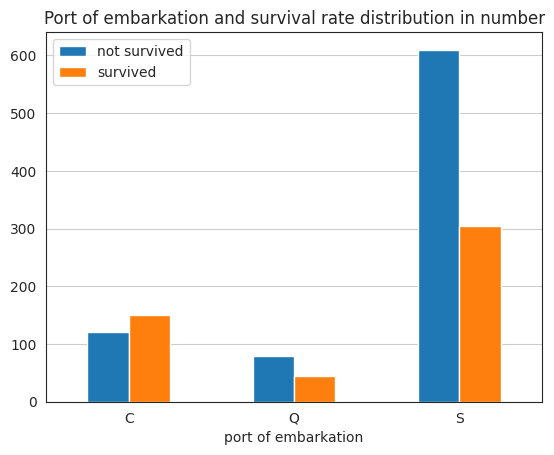

In [ ]:
df_port.plot(kind='bar', rot=0, title ='Port of embarkation and survival rate distribution in number')
plt.grid(axis='y')

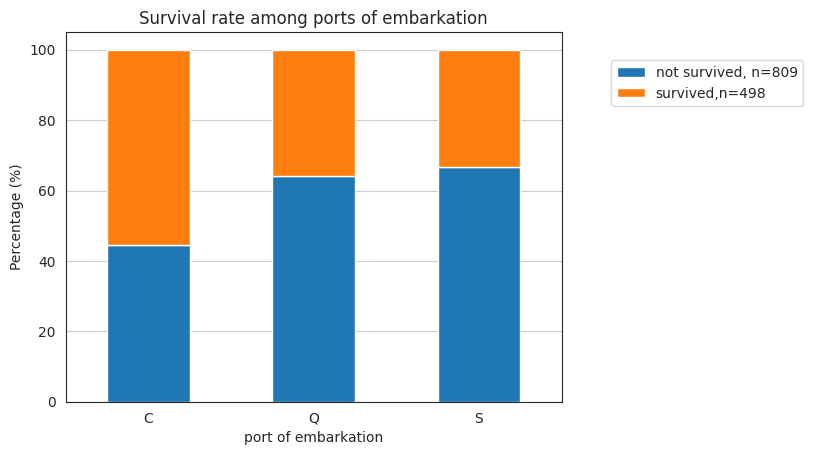

In [ ]:
df_port_col.plot(kind='bar', stacked =True, rot=0, title ='Survival rate among ports of embarkation')
plt.ylabel('Percentage (%)')
plt.grid(axis='y')
plt.legend(loc=(1.1,0.8))

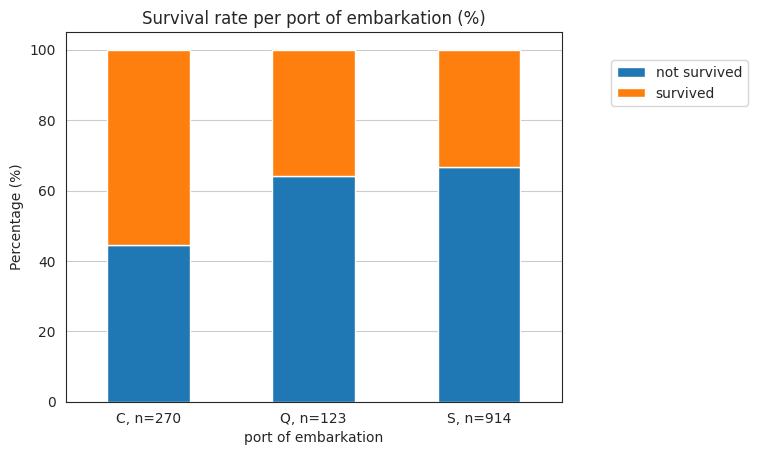

In [ ]:
df_port_row.plot(kind='bar', stacked =True, rot=0, title ='Survival rate per port of embarkation (%)')
plt.ylabel('Percentage (%)')
plt.grid(axis='y')
plt.legend(loc=(1.1,0.8))

###6. Pivot table - gender distribution from body recovered from unsurvived passenger
Conclusion: Most of the body recovered was male

In [ ]:
df_bodyrecovered = pd.pivot_table(df[df['body'].notna()], index=['sex'], values=['body'], aggfunc='count')
df_bodyrecovered
df_bodyrecovered['%']=df_bodyrecovered['body']/df_bodyrecovered['body'].sum()*100
df_bodyrecovered.style.format({'body':'{:.0f}','%':'{:.2f}'})

,body,%
sex,,
female,8,6.61
male,113,93.39


###7. Age vs class - correlation matrix + box plot


In [ ]:
corr_age_class = df[['age','pclass']].corr()
corr_age_class

,age,pclass
age,1.000000,-0.408106
pclass,-0.408106,1.000000


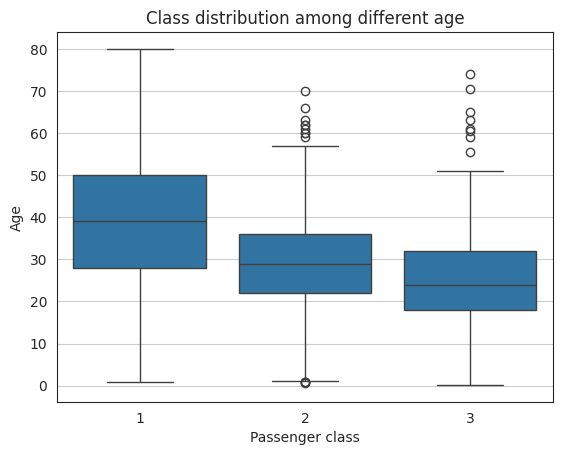

In [ ]:
sns.boxplot(data =df, x='pclass', y='age')
plt.title('Class distribution among different age')
plt.xlabel('Passenger class')
plt.ylabel('Age')
plt.grid(axis='y')

###8. Correlation Coefficient

In [ ]:
corr_matrix = df[['pclass','age','sibsp','parch','survived','fare']].corr()
corr_matrix

,pclass,age,sibsp,parch,survived,fare
pclass,1.000000,-0.408106,0.060832,0.018322,-0.312469,-0.558629
age,-0.408106,1.000000,-0.243699,-0.150917,-0.055513,0.178739
sibsp,0.060832,-0.243699,1.000000,0.373587,-0.027825,0.160238
parch,0.018322,-0.150917,0.373587,1.000000,0.082660,0.221539
survived,-0.312469,-0.055513,-0.027825,0.082660,1.000000,0.244265
fare,-0.558629,0.178739,0.160238,0.221539,0.244265,1.000000


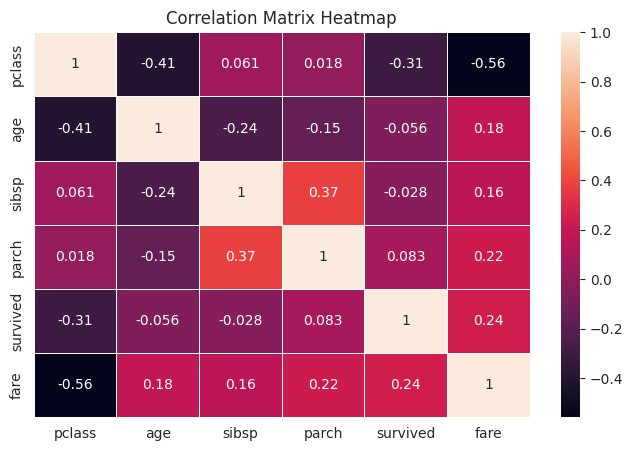

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()